In [1]:
import pickle
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from utils.preprocessing import *

### predict using the model

In [2]:
[features, scaled_features] = np.load('../processed_data/features_video_2.npy', allow_pickle=True)
with open('../realtime_model.pkl', 'rb') as fr:
    model = pickle.load(fr)
predictions = model.predict(features)

### place side-by-side to visualize pattern

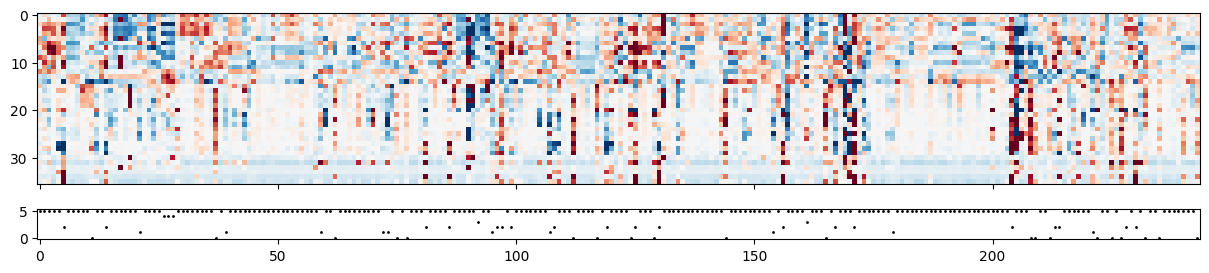

In [6]:
# plot scaled features with the corresponding predictions
fig, ax = plt.subplots(2, 1, figsize=(15, 3), gridspec_kw={'height_ratios': [6, 1]}, sharex=True)
# first 30 seconds
ax[0].imshow(scaled_features.T[:, ::10], vmin=-2, vmax=2, cmap='RdBu_r')
ax[1].scatter(np.arange(len(predictions[::10])), predictions[::10], s=1, color='k')
plt.show()

In [8]:
predictions[:50]

array([5., 5., 5., 0., 0., 0., 5., 5., 5., 5., 5., 2., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 2., 2., 2., 2., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 1., 1., 1., 2., 2., 5., 5., 5., 5., 0., 5., 0., 2., 2., 2.])

In [9]:
idx_start = np.where(np.diff(predictions)!=0)[0]+1
np.unique([predictions[id_start] for id_start in idx_start], return_counts=True)

(array([0., 1., 2., 3., 4., 5.]),
 array([ 92,  69,  61,  14,   5, 188], dtype=int64))

### Save processed file

In [10]:
np.save('../processed_data/predict_video_2.npy', predictions)